Nombres: Karoll Michely Parada Jaime;
         Carlos Alberto Hernandez Jaimes

1. Encontrar la transformada inversa de Fourier, tal cual lo hicimos en la última clase, para el número de manchas solares como función del tiempo. Usando las dos frecuencias dominantes. Interprete y analice físicamente el significado de estas dos frecuencias.

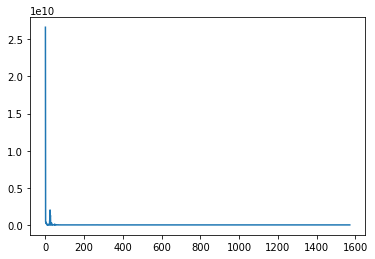

In [2]:
from numpy import zeros,loadtxt
from pylab import plot,xlim,show, grid,ylim
from cmath import exp,pi, cos, sin

data= loadtxt("sunspots.txt",float)
y=data[:,1]
def dft(y):
    N = len(y)
    c = zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c
d = dft(y)
plot(abs(d)**2)
show()

163198.7000000001


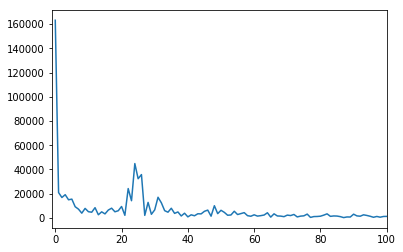

(163198.7000000001+0j)
(6886.1220461627945-44349.95433467131j)
163198.7000000001
44881.3672510328
3143


In [3]:
c = dft(y)
plot(abs(d))
print(abs(c[0]))
xlim(-1,100)
show()
print(d[0])
print(d[24])
print(abs(d[0]))
print(abs(d[24]))
print(len(y))

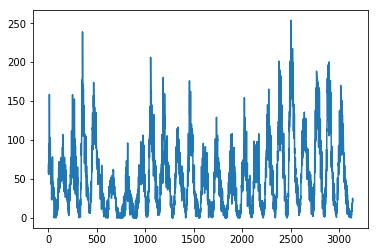

In [4]:
y = loadtxt("sunspots.txt",float)
plot(data[:,0],data[:,1])
show()


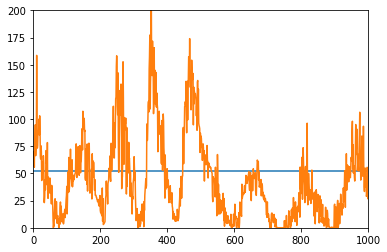

In [13]:
N=3143 
f =0/N
h = zeros(N,complex)
for i in range (0,1024):
    h[i] = (d[0]/N)*(cos(2 * pi * f*i)  + (1j)*sin(2*pi*f*i)) 
plot(h)
plot(data[:,0],data[:,1])
xlim(0,1000)
ylim(0,200)
show()


segun  la grafica podemos observar que hay una relacion aproximada de 44.000 manchas solares cada dos años o cada 24 meses lo que ha generado de fortma aproximada 35 ciclos hasta el momento. 

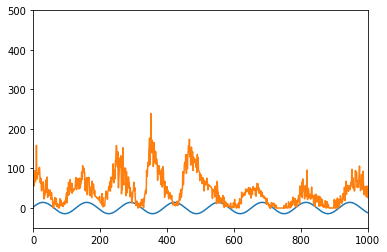

In [6]:
N=3143
f =24/N
l = zeros(N,complex)
for i in range (0,1024):
    l[i] = (d[24]/N)*(cos(2 * pi * f*i)  + (1j)*sin(2*pi*f*i)) 

plot(l)
plot(data[:,0],data[:,1])
xlim(0,1000)
ylim(-50,500)
show()

al realizar la transformada de fourier inversa se puesde oservar que esta frecuancia tiene a ser armonica sinisoidal, lo que genera el pico maximo en 24 por tanto podemos inferir que la cantidad de manchas solares cada 24 mese son similares y estan al redodor de 44.000 machas solares.    

Ejercicio 7.4: filtrado y suavizado de Fourier
En los recursos en línea encontrará un archivo llamado dow.txt. Contiene el valor de cierre diario para
cada día hábil desde finales de 2006 hasta finales de 2010 del Dow Jones Industrial Average,
que es una medida de los precios promedio en el mercado de valores de EE. UU.
Escriba un programa para hacer lo siguiente:
a) Lea los datos de dow.txt y grábelos en un gráfico.
b) Calcule los coeficientes de la transformada discreta de Fourier de los datos utilizando la función
rfft de numpy.fft, que produce una matriz de 2 1 N + 1 números complejos.
c) Ahora establezca todos menos el primer 10% de los elementos de esta matriz en cero (es decir, establezca el último 90% en
cero, pero mantenga los valores del primer 10%).
d) Calcule la transformada inversa de Fourier de la matriz resultante, ceros y todo, usando el
irfft y trazarlo en el mismo gráfico que los datos originales. Es posible que deba variar
los colores de las dos curvas para asegurarse de que ambas aparezcan en el gráfico. Comenta en
lo que ves ¿Qué sucede cuando configura los coeficientes de Fourier en cero?
e) Modifique su programa para que ponga todos menos el primer 2% de los coeficientes a cero y ejecute
de nuevo



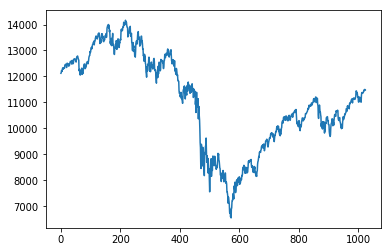

In [7]:
from numpy import loadtxt, zeros, copy
from numpy.fft import rfft, irfft
from pylab import plot, show, xlabel, ylabel

dow = loadtxt("dow.txt", float)
plot(dow)
show()



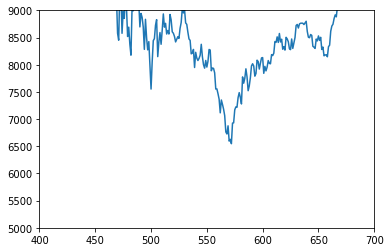

In [8]:
dow = loadtxt("dow.txt", float)
plot(dow)
xlim(400,700)
ylim(5000,9000)
show()

aproximadamente un año y medio la accion en la bolsa disminuyo a 6500 aproximadamente en terminos generales su comportamiento a tendido a aumentar 

In [9]:
dow_fourier = rfft(dow)
N = len(dow_fourier)
print(dow_fourier)
print(N)

[ 1.12839039e+07+0.00000000e+00j  6.84127740e+05-9.55087519e+05j
 -4.19226205e+05+9.29089562e+04j  7.41901498e+04-2.73812250e+05j
 -3.51856811e+04+7.23658613e+04j  1.11482643e+05-3.14779807e+04j
  2.16752824e+04-2.45751549e+04j  1.11224416e+04+2.47975704e+04j
  3.11884665e+04+2.27868210e+04j  7.38523102e+03-3.21233427e+04j
 -3.39615972e+04-1.07833052e+05j -1.23569569e+04+2.73171276e+04j
  2.13837315e+04-9.16684147e+04j -4.32441725e+04+9.92294540e+04j
 -3.55753518e+03-2.54972743e+04j -3.04367677e+04-1.72551151e+04j
 -9.31799610e+03-2.49297658e+04j -9.35033325e+03-1.75612302e+04j
  1.17418062e+04+2.09235370e+04j  4.22549031e+04-2.38143067e+03j
  1.35294835e+04-3.06720066e+04j  4.06499470e+03-2.87140744e+04j
 -1.56146318e+04+2.24811825e+04j  1.35756353e+04-1.28123867e+04j
  1.20484888e+04+3.50866363e+03j -1.55111478e+04-1.70617041e+04j
  8.98307189e+03+4.49546331e+03j  4.42970647e+03+1.59761534e+03j
 -3.00967682e+04-3.74705070e+04j -1.96285643e+03-4.83894355e+03j
  2.97970267e+03-1.915635

/home/usuario/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


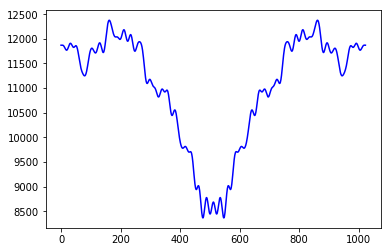

In [10]:
primer_10_porcentaje= zeros(N, float)
primer_10_porcentaje[0 : int(N / 10)] = copy(dow_fourier[0 : int(N / 10)])
dow_primer_10_porcentaje  = irfft(primer_10_porcentaje)

plot(dow_primer_10_porcentaje, 'b')


cuando ya se empieza a colocara porcentajes las curvas van tomando forma armonica en este caso se estan trabajando con 52 datos aproximadamente

/home/usuario/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


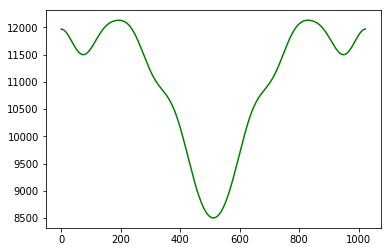

In [11]:
primer_2_porcentaje = zeros(N, float)
primer_2_porcentaje[0 : int(N / 50)] = copy(dow_fourier[0 : int(N / 50)])
dow_primer_2_porcentaje =irfft(primer_2_porcentaje)

plot(dow_primer_2_porcentaje, 'g')

ahora que se está trabajando con 50% de los datos que es una aproximado de  257 datos de como fluctua la accion en la bolsa, podemos ver con mayort claridad que su comportamiento es mas parecido una función sinisoidal, con esta información se puede ver los picos maximos y minimos donde la accion tubo mayor o menor valor y suponiendo que su comportamiento se mantenga periodica se podran predecir los futurtos valores que puede tomar la accion en un tiempo postarior al intercvalo analizado 

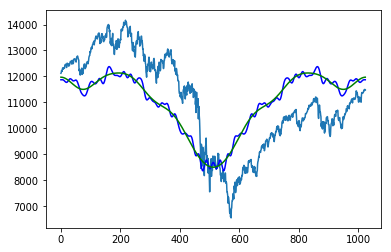

In [12]:
plot(dow)
plot(dow_primer_10_porcentaje, 'b')
plot(dow_primer_2_porcentaje, 'g')